# Powersensor 基础教程 上篇

这部分教程主要包含如何使用opencv库对摄像头采集的图像进行预处理以及一些简单的图像特征提取

引用需要的库

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import PowerSensor as ps

/usr/lib/python2.7/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


初始化摄像头和串口模块的操作对象

In [2]:
# 这个对象用于操作摄像头
cam1 = ps.ImageSensor()
# 这个对象用于操作串口
s1 = ps.UsartPort()

# 如何在图像做标记

## 使用opencv读取本地的图片以及显示它
1. 使用jupyter主界面上的上传按钮可以将电脑上的图片上传到powersensor
![psUpdate](./img/psUpdate.png)
2. 调用opencv的图片读取函数，并提取各个通道
3. **不能**使用opencv的**imshow**, 而应该使用系统带的**showimg** 

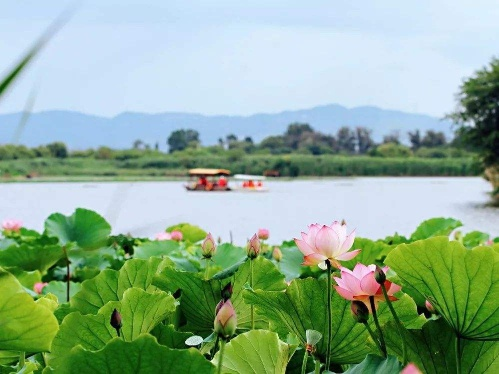

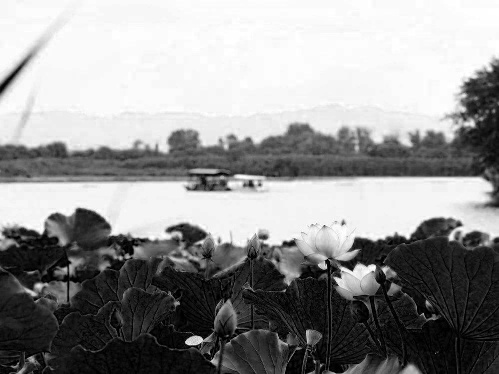

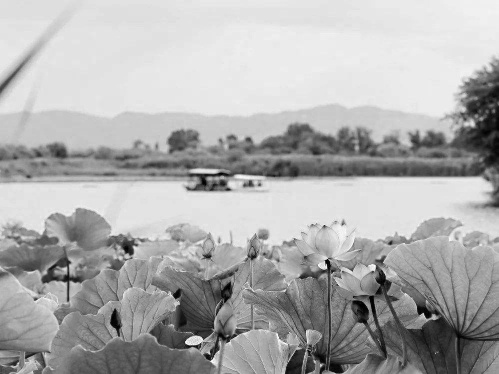

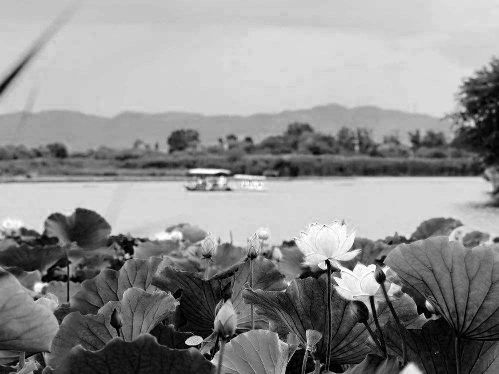

In [21]:
img = cv2.imread("./img/flower.jpg")
img_w = img.shape[1]
img_h = img.shape[0]
# 缩放图片
smallImg = cv2.resize(img, (img_w / 2, img_h / 2))
ps.CommonFunction.show_img_jupyter(smallImg)
b = smallImg[:, :, 0]
g = smallImg[:, :, 1]
r = smallImg[:, :, 2]
ps.CommonFunction.show_img_jupyter(b)
ps.CommonFunction.show_img_jupyter(g)
ps.CommonFunction.show_img_jupyter(r)

## 在图片上做标记
1. 画线
2. 画矩形
3. 画圆圈
4. 画椭圆
5. 画多边形
6. 添加文本

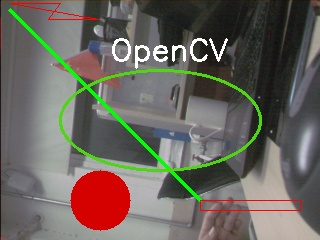

0.0208909511566


In [20]:
for i in range(100):
    start = time.time()        # 记录开始时间
    clear_output(wait=True)    # 清除图片，在同一位置显示，不使用会打印多张图片
    imgMat = cam1.read_img_ori()       # 读入图像
    
    # 缩小图像为320x240尺寸
    tempImg = cv2.resize(imgMat, (320,240))  
    
    # 1. 在tempImg图像上划线，从（10,10）到（200,200）坐标，绿色，3个像素宽度
    cv2.line(tempImg,(10,10),(200,200),(0,255,0),3)    
    
    # 2. 在tempImg图像上画矩形，（10,10）为左上顶点，（30,40）为右下顶点
    cv2.rectangle(tempImg,(200,200),(300,210),(0,0,255),1) 
    
    # 3. 画圆，参数依次为圆心、半径、颜色BGR,填充-1或线宽像素n
    cv2.circle(tempImg,(100,200),30,(0,0,213),-1)      
    
    # 4. 画椭圆_需要输入中心点位置，长轴和短轴的长度，
    cv2.ellipse(tempImg,(160,120),(100,50),0,0,360,(20,213,79),2) # 椭圆沿逆时针选择角度，椭圆沿顺时针方向起始角度和结束角度
                                                          
    # 5. 绘制多边形    
    pts=np.array([[10,3],[60,3],[48,19],[98,19]],np.int32) # 数据类型必须是int32
    pts=pts.reshape((-1,1,2)) 
    # 这里 reshape 的第一个参数为-1, 表明这一维的长度是根据后面的维度的计算出来的。
    # 如果第三个参数是 False，我们得到的多边形是不闭合的（首尾不相连）。
    cv2.polylines(tempImg,[pts],True,(0,0,255),1) # 图像，点集，是否闭合，颜色，线条粗细

    # 6. 添加文字，参数：绘制的文字，位置，字型，字体大小，文字颜色，线型
    font=cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(tempImg,'OpenCV',(110,60), font, 1,(255,255,255),2)
    
    end = time.time()
    ps.CommonFunction.show_img_jupyter(tempImg)
    print(end - start)
    time.sleep(0.1)


# 图像预处理1，常见变换

## 缩放、裁剪、平移

这些变换可以通过仿射变换来一次性实现
![仿射变换公式](./img/baisc1_fsTrans.png)
其中矩阵A描述旋转部分，矩阵B描述平移操作，当矩阵A的行列式大于1会放大图像，反之缩小。具体原理见博客教程。

原图像：


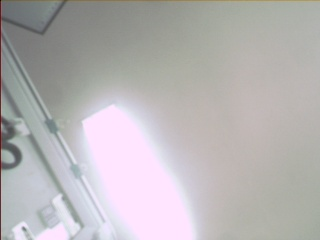

比例缩放：


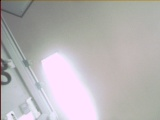

裁剪：


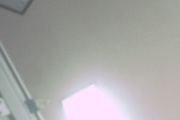

平移：


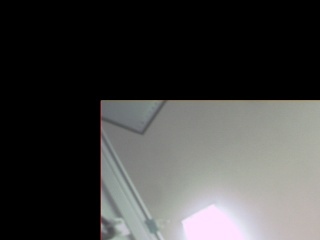

0.140268802643


In [8]:
img = None
for i in range(100):
    start = time.time()        # 记录开始时间
    clear_output(wait=True)    # 清除图片，在同一位置显示，不使用会打印多张图片
    
    imgMat = cam1.read_img_ori()       # 读入图像
    
    # 缩小图像为320x240尺寸
    origin = cv2.resize(imgMat, (320,240))  
    print("原图像：")
    ps.CommonFunction.show_img_jupyter(origin)
    
    # 按比例缩放
    img_scale = cv2.resize(origin, (0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_NEAREST)
    print("比例缩放：")
    ps.CommonFunction.show_img_jupyter(img_scale)
    
    # 裁剪, 第一个变量是行，第二个变量是列
    img_crop = origin[20:140, 20:200]
    print("裁剪：")
    ps.CommonFunction.show_img_jupyter(img_crop)
    
    # 平移
    # 平移可以通过仿射变换来实现
    matrix = np.float32([[1, 0, 100], [0, 1, 100]])
    rows,cols,_ = origin.shape
    print("平移：")
    img_mv = cv2.warpAffine(origin, matrix, (cols, rows))
    ps.CommonFunction.show_img_jupyter(img_mv)
    
    end = time.time()
    print(end - start)
    time.sleep(0.1)

## 旋转、翻转与扭曲
旋转和扭曲也主要通过仿射变换来实现，不过可以通过opencv的内置函数来获取需要的旋转矩阵。

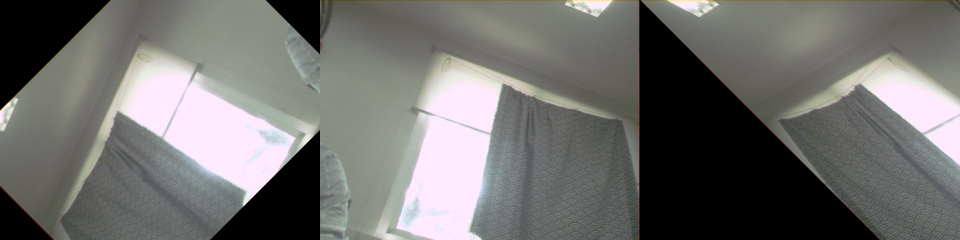

0.106578826904


In [9]:
img = None
for i in range(100):
    start = time.time()        # 记录开始时间
    clear_output(wait=True)    # 清除图片，在同一位置显示，不使用会打印多张图片
    
    imgMat = cam1.read_img_ori()       # 读入图像
    
    # 缩小图像为320x240尺寸
    origin = cv2.resize(imgMat, (320,240))  
    rows,cols,_ = origin.shape
    
    
    # 第一个参数是旋转中心，第二个参数是旋转角度，第三个参数是缩放比例 
    matrix = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)
    img_rot = cv2.warpAffine(origin, matrix, (cols, rows))
    
    # 翻转,第二个参数是方向，1是水平，0是垂直，-1是都翻
    img_flip = cv2.flip(origin, 1)
    
    # 扭曲，x轴的剪切shear变换，角度45°
    theta = 45 * np.pi / 180
    M_shear = np.array([
        [1, np.tan(theta), 0],
        [0, 1, 0]
    ], dtype=np.float32)
    img_sheared = cv2.warpAffine(origin, M_shear, (cols, rows))
    
    # 把图像拼接在一起显示
    img_combine = np.hstack([img_rot, img_flip, img_sheared])

    ps.CommonFunction.show_img_jupyter(img_combine)
    
    end = time.time()
    print(end - start)
    time.sleep(0.1)

## 色彩空间变换
常见的色彩空间有RGB，HSV，gray等，RGB比较贴近传感器采集的原始数据，而HSV比较贴近视觉感受的颜色，gray是灰度。RGB是红绿蓝，HSV由色相、饱和度、明度组成。opencv提供丰富的函数来进行各种通道的颜色转换，本摄像头采集的原始图像数据是RGB的。

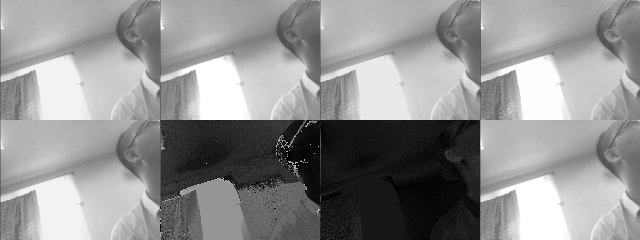

0.0573511123657


In [16]:
img = None
for i in range(100):
    start = time.time()        # 记录开始时间
    clear_output(wait=True)    # 清除图片，在同一位置显示，不使用会打印多张图片
    
    imgMat = cam1.read_img_ori()       # 读入图像
    
    # 缩小图像为160x120尺寸,
    origin = cv2.resize(imgMat, (160,120))  
    rows,cols,_ = origin.shape
    
    img_r = origin[:, :, 0]
    img_g = origin[:, :, 1]
    img_b = origin[:, :, 2]
    
    # bgr2hsv
    img_hsv=cv2.cvtColor(origin,cv2.COLOR_BGR2HSV)#HSV空间
    img_h = img_hsv[:, :, 0]
    img_s = img_hsv[:, :, 1]
    img_v = img_hsv[:, :, 2]

    img_gray=cv2.cvtColor(origin,cv2.COLOR_BGR2GRAY)#HSV空间
    
    # 把图像拼接在一起显示
    # print("第一行：灰度，r,g,b;第二行：灰度,h,s,v")
    img_line1 = np.hstack([img_gray, img_r, img_g, img_b])
    img_line2 = np.hstack([img_gray, img_h, img_s, img_v])
    img_combine = np.vstack([img_line1, img_line2])

    ps.CommonFunction.show_img_jupyter(img_combine)
    
    end = time.time()
    print(end - start)
    time.sleep(0.1)

# 图像预处理2，平滑处理

图像的平滑处理主要用于减小图像上的早点或者失真，也经常被成为模糊处理。
opencv提供的平滑处理函数分线性和非线性两种，线性的有方框滤波、均值滤波、高斯滤波等，非线性滤波有中值滤波、双线性滤波等。

方框滤波、均值滤波、高斯滤波对高斯白噪声滤除效果较好，但是会带来模糊。
中值滤波对椒盐噪声滤除效果较好。

## 均值滤波

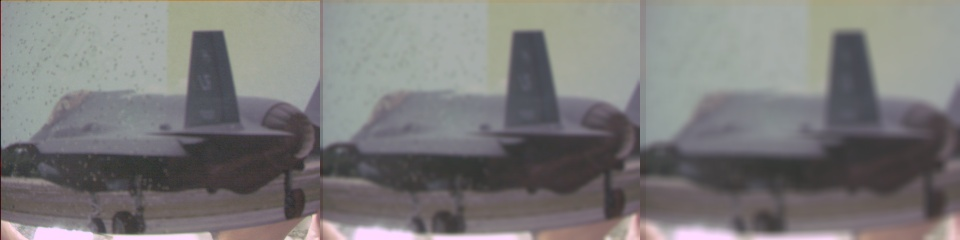

0.0150611400604


In [23]:
img = None
for i in range(100):
    
    clear_output(wait=True)    # 清除图片，在同一位置显示，不使用会打印多张图片
    
    imgMat = cam1.read_img_ori()       # 读入图像
    
    # 缩小图像为320x240尺寸
    origin = cv2.resize(imgMat, (320,240))  
    rows,cols,_ = origin.shape
    
    start = time.time()        # 记录开始时间
    
    # 第一个参数是原图像，第二个参数是窗口的大小
    img_mean1 = cv2.blur(origin, (5,5))
    img_mean2 = cv2.blur(origin, (10,10))
    
    end = time.time()        # 记录开始时间
    
#     # 把图像拼接在一起显示
    img_combine = np.hstack([origin, img_mean1, img_mean2])

    ps.CommonFunction.show_img_jupyter(img_combine)
    
    
    print(end - start)
    time.sleep(0.1)


方框滤波与均值滤波的效果类似，可以看出随着滤波窗口的变换，图像也变得模糊。
## 高斯滤波
高斯滤波考虑了全局信息，在达到与均值滤波差不多的去噪效果时依然有较好的边缘特性，但是要消耗更多的资源。

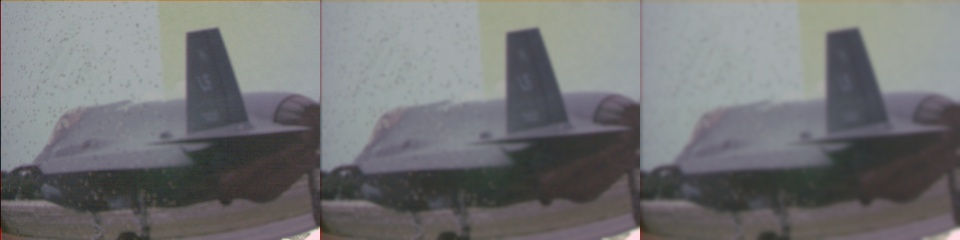

0.0261399745941


In [25]:
img = None
for i in range(100):
    
    clear_output(wait=True)    # 清除图片，在同一位置显示，不使用会打印多张图片
    
    imgMat = cam1.read_img_ori()       # 读入图像
    
    # 缩小图像为320x240尺寸
    origin = cv2.resize(imgMat, (320,240))  
    rows,cols,_ = origin.shape
    
    start = time.time()        # 记录开始时间
    
    # 第一个参数是原图像，第二个参数是窗口的大小
    img_gauss1 = cv2.GaussianBlur(origin, (5, 5), 0)
    img_gauss2 = cv2.GaussianBlur(origin, (9, 9), 0)
    
    end = time.time()        # 记录开始时间
    
    # 把图像拼接在一起显示
    img_combine = np.hstack([origin, img_gauss1, img_gauss2])

    ps.CommonFunction.show_img_jupyter(img_combine)
    
    print(end - start)
    time.sleep(0.1)

## 中值滤波
中值滤波可以有效地滤除椒盐噪声，但是会让边缘变得很’软‘。同时中值滤波消耗的计算资源是均值滤波的6倍甚至更高。

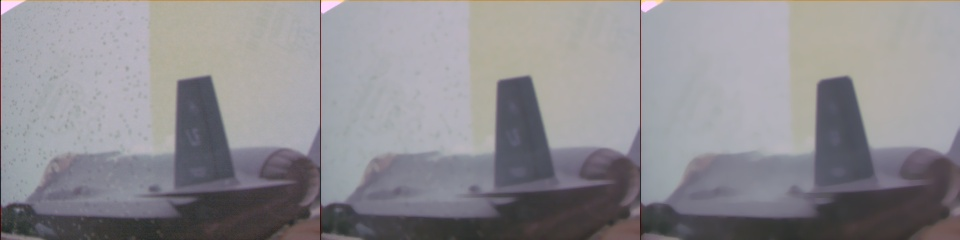

0.0973598957062


In [26]:
img = None
for i in range(100):
    
    clear_output(wait=True)    # 清除图片，在同一位置显示，不使用会打印多张图片
    
    imgMat = cam1.read_img_ori()       # 读入图像
    
    # 缩小图像为320x240尺寸
    origin = cv2.resize(imgMat, (320,240))  
    rows,cols,_ = origin.shape
    
    start = time.time()        # 记录开始时间
    
    # 第一个参数是原图像，第二个参数是窗口的大小
    img_mid1 = cv2.medianBlur(origin, 5)
    img_mid2 = cv2.medianBlur(origin, 9)
    
    end = time.time()        # 记录开始时间
    
    # 把图像拼接在一起显示
    img_combine = np.hstack([origin, img_mid1, img_mid2])

    ps.CommonFunction.show_img_jupyter(img_combine)
    
    print(end - start)
    time.sleep(0.1)

## 双边滤波
双边滤波是一种更复杂的滤波器，以上的滤波方法的滤波权重至于像素在图像中的位置有关，双边滤波还与图像的灰度差有关，所以它可以比较好的保存图像的梯度特征。这个滤波器非常消耗资源。

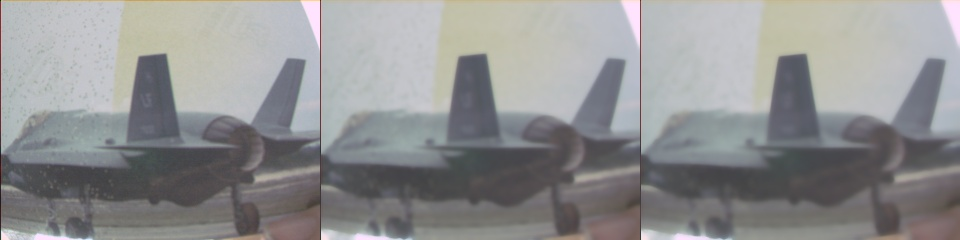

0.246999979019


In [39]:
img = None
for i in range(100):
    
    clear_output(wait=True)    # 清除图片，在同一位置显示，不使用会打印多张图片
    
    imgMat = cam1.read_img_ori()       # 读入图像
    
    # 缩小图像为320x240尺寸
    origin = cv2.resize(imgMat, (320,240))  
    rows,cols,_ = origin.shape
    
    start = time.time()        # 记录开始时间
    
    # 第一个参数是原图像，第二个参数是窗口的大小
    img_dual1 = cv2.bilateralFilter(origin,7,120,120)
    img_dual2 = cv2.bilateralFilter(origin,9,120,120)
    
    end = time.time()        # 记录开始时间
    
    # 把图像拼接在一起显示
    img_combine = np.hstack([origin, img_dual1, img_dual2])

    ps.CommonFunction.show_img_jupyter(img_combine)
    
    print(end - start)
    time.sleep(0.1)

# 图像预处理3，形态学处理

图像的平滑处理是在灰度图的层面对图像进行去初步的去噪，这个过程之后有时需要对图像进行二值化操作，二值化后的图像更容易让‘程序’发现隐含在图像中的特征。二值化的图像也经常需要进行预处理，去除一些噪点，建立更好的联通区，这个称为形态学预处理。

**注意：** 腐蚀膨胀这个操作是针对白色的区域而言，就是对灰度值为255的点而言的，对于黑色的区域刚好是相反的。

本部分要介绍的形态学预处理包含：
1. 腐蚀、膨胀操作：
1. 开运算、闭运算：
1. 高帽操作、黑帽操作：

## 腐蚀、膨胀操作：

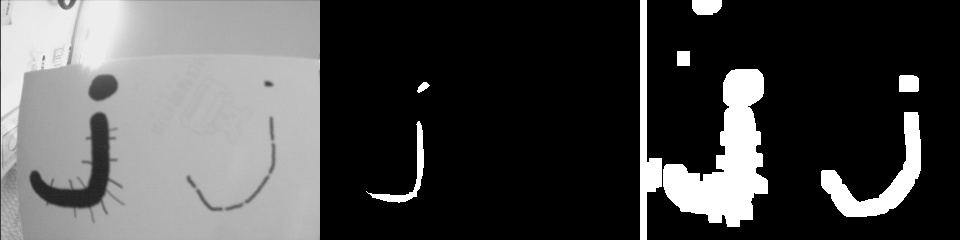

0.0249109268188


In [6]:
img = None
for i in range(100):
    
    clear_output(wait=True)    # 清除图片，在同一位置显示，不使用会打印多张图片
    
    imgMat = cam1.read_img_ori()       # 读入图像
    
    # 缩小图像为320x240尺寸
    origin = cv2.resize(imgMat, (320,240))  
    rows,cols,_ = origin.shape
    
    start = time.time()        # 记录开始时间
    
    
    # 把图片转换成灰度图
    img_gray = cv2.cvtColor(origin, cv2.COLOR_BGR2GRAY)
    # 二值化灰度后的图片
    _, img_binary = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY)
    # 因为图片上的字是黑色的，而腐蚀、膨胀是针对白色区域的，因此需要进行翻转
    img_binary = 255 - img_binary
    
    # 腐蚀
    kernel = np.ones((3, 3), np.uint8)
    img_erode = cv2.erode(img_binary, kernel, iterations=6)
    
    # 膨胀
    kernel = np.ones((3, 3), np.uint8)
    img_dilate = cv2.dilate(img_binary, kernel, iterations=6)
    
    
    end = time.time()        # 记录开始时间
    
#     # 把图像拼接在一起显示
    img_combine = np.hstack([img_gray, img_erode, img_dilate])

    ps.CommonFunction.show_img_jupyter(img_combine)
    
    
    print(end - start)
    time.sleep(0.1)

腐蚀膨胀是非常快的操作，从结果可以看出来，腐蚀操作可以去除左边的j的小胡须，但是会把右边的j腐蚀光。而膨胀操作可以把右边的j断开的比划连载一起，但是会导致左边的j变糊。因此需要根据实际的效果来选择合适的操作。

腐蚀和膨胀操作虽然可以去除噪点以及连接散块，但是它会影响原图像的性状，把他们两个结合在一起可以解决这个问题，这就是：

## 开操作、闭操作

开运算：先腐蚀后膨胀，用于移除由图像噪音形成的斑点；
闭运算：先膨胀后腐蚀，用来连接被误分为许多小块的对象。

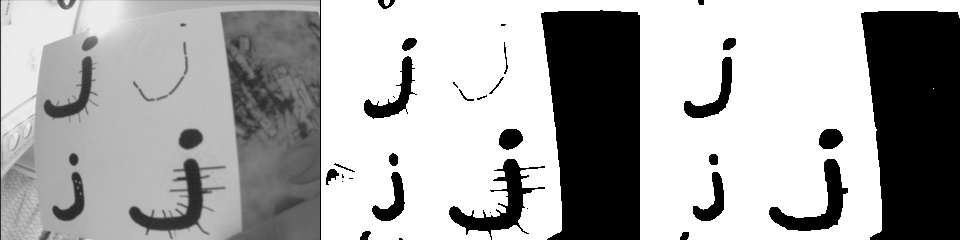

0.0184800624847


In [5]:
img = None
for i in range(100):
    
    clear_output(wait=True)    # 清除图片，在同一位置显示，不使用会打印多张图片
    
    imgMat = cam1.read_img_ori()       # 读入图像
    
    # 缩小图像为320x240尺寸
    origin = cv2.resize(imgMat, (320,240))  
    rows,cols,_ = origin.shape
    
    start = time.time()        # 记录开始时间
    
    
    # 把图片转换成灰度图
    img_gray = cv2.cvtColor(origin, cv2.COLOR_BGR2GRAY)
    # 二值化灰度后的图片
    _, img_binary = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY)
    # 因为图片上的字是黑色的，而腐蚀、膨胀是针对白色区域的，因此需要进行翻转
    img_binary = img_binary
    
    # 开操作
    kernel = np.ones((3, 3), np.uint8)
    img_open = cv2.morphologyEx(img_binary, cv2.MORPH_OPEN, kernel)
#     img_erode = cv2.erode(img_binary, kernel, iterations=6)
    
    # 闭操作
    kernel = np.ones((5, 5), np.uint8)
    img_close = cv2.morphologyEx(img_binary, cv2.MORPH_CLOSE, kernel)
#     img_dilate = cv2.dilate(img_binary, kernel, iterations=6)
    
    
    end = time.time()        # 记录开始时间
    
#     # 把图像拼接在一起显示
    img_combine = np.hstack([img_gray, img_open, img_close])

    ps.CommonFunction.show_img_jupyter(img_combine)
    
    
    print(end - start)
    time.sleep(0.1)

## 高帽操作，黑帽操作

图像顶帽（或图像礼帽）运算是原始图像减去图像开运算的结果

图像黑帽运算是图像闭运算操作减去原始图像的结果

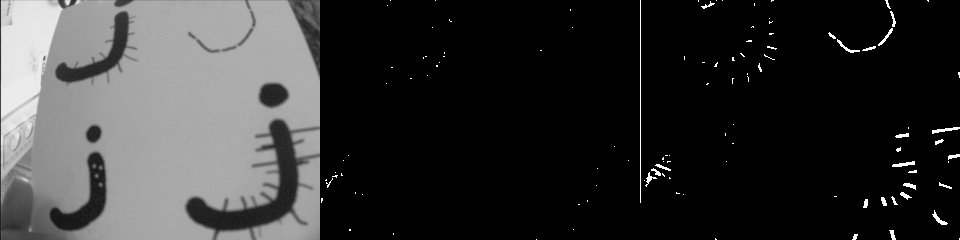

0.0190899372101


In [8]:
img = None
for i in range(100):
    
    clear_output(wait=True)    # 清除图片，在同一位置显示，不使用会打印多张图片
    
    imgMat = cam1.read_img_ori()       # 读入图像
    
    # 缩小图像为320x240尺寸
    origin = cv2.resize(imgMat, (320,240))  
    rows,cols,_ = origin.shape
    
    # ---------------------  图像处理开始  ----------------------------------------
    start = time.time()        # 记录开始时间
    
    # 把图片转换成灰度图
    img_gray = cv2.cvtColor(origin, cv2.COLOR_BGR2GRAY)
    # 二值化灰度后的图片
    _, img_binary = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY)
    # 因为图片上的字是黑色的，而腐蚀、膨胀是针对白色区域的，因此需要进行翻转
    img_binary = img_binary
    
    # 高帽操作
    kernel = np.ones((3, 3), np.uint8)
    img_tophat = cv2.morphologyEx(img_binary, cv2.MORPH_TOPHAT, kernel)
#     img_erode = cv2.erode(img_binary, kernel, iterations=6)
    
    # 黑帽操作
    kernel = np.ones((5, 5), np.uint8)
    img_blackhat = cv2.morphologyEx(img_binary, cv2.MORPH_BLACKHAT, kernel)
#     img_dilate = cv2.dilate(img_binary, kernel, iterations=6)
    
    
    end = time.time()        # 记录结束时间
    # ---------------------  图像处理结束  ----------------------------------------
    
#     # 把图像拼接在一起显示
    img_combine = np.hstack([img_gray, img_tophat, img_blackhat])

    ps.CommonFunction.show_img_jupyter(img_combine)
    
    
    print(end - start)
    time.sleep(0.1)

# 图像的特征1，直方图特征

1. 如何得到图片的直方图
1. 直方图均衡化

直方图均衡化的过程可以形象地表示为：
![Histogrammeinebnung](./img/Histogrammeinebnung.png/)

## 输出图像的直方图

In [28]:
# 根据灰度图像生成直方图的函数
def get_hist_img(img_single, color):
    img_h = np.zeros((240,320)) #创建用于绘制直方图的全0图像 
    originHist = cv2.calcHist([img_single],[0],None,[256],[0,256])  # 计算直方图参数
    cv2.normalize(originHist, originHist,0,240*0.9,cv2.NORM_MINMAX)   # 对数据进行归一化，方便绘图
    hist = np.int32(np.around(originHist))  # 取整
    bins = np.arange(256).reshape(256,1) # 直方图中各bin的顶点位置 
    pts = np.column_stack((bins, hist)) 
    cv2.polylines(img_h, [pts], False, color)
    img_h = np.flipud(img_h)  
    return img_h

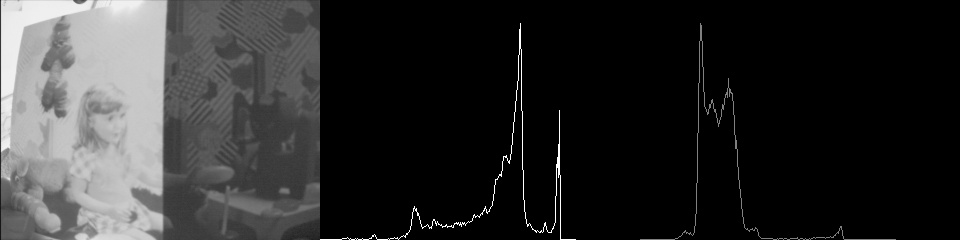

0.00561189651489


In [31]:
img = None
for i in range(100):
    
    clear_output(wait=True)    # 清除图片，在同一位置显示，不使用会打印多张图片
    
    imgMat = cam1.read_img_ori()       # 读入图像
    
    # 缩小图像为320x240尺寸
    origin = cv2.resize(imgMat, (320,240))  
    rows,cols,_ = origin.shape
    
    # ---------------------  图像处理开始  ----------------------------------------
    start = time.time()        # 记录开始时间
    
    # 把图片转换成灰度图
    img_gray = cv2.cvtColor(origin, cv2.COLOR_BGR2GRAY)
    
    # 把图片分成左右两个部分
    img1 = img_gray[:, 0:160]
    img2 = img_gray[:, 160:]
    
    # 调用自定义函数绘制直方图
    img_h1 = get_hist_img(img1, (255, 255, 255))
    img_h2 = get_hist_img(img2, (128, 128, 128))
    
    end = time.time()        # 记录结束时间
    # ---------------------  图像处理结束  ----------------------------------------
    
    # 把图像拼接在一起显示
    img_combine = np.hstack([img_gray, img_h1, img_h2])
    ps.CommonFunction.show_img_jupyter(img_combine)
    
    
    print(end - start)
    time.sleep(0.1)



## 直方图均衡化

使用opencv进行直方图均衡化很容易，调用equalizeHist函数即可

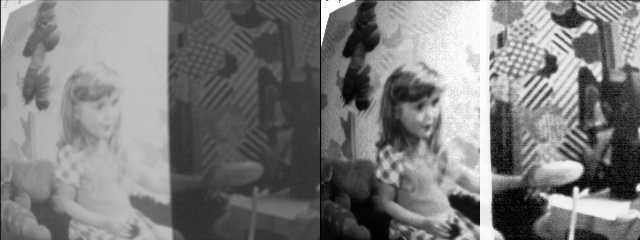

0.00277709960938


In [8]:
img = None
for i in range(100):
    
    clear_output(wait=True)    # 清除图片，在同一位置显示，不使用会打印多张图片
    
    imgMat = cam1.read_img_ori()       # 读入图像
    
    # 缩小图像为320x240尺寸
    origin = cv2.resize(imgMat, (320,240))  
    rows,cols,_ = origin.shape
    
    # ---------------------  图像处理开始  ----------------------------------------
    start = time.time()        # 记录开始时间
    
    # 把图片转换成灰度图
    img_gray = cv2.cvtColor(origin, cv2.COLOR_BGR2GRAY)
    
    # 把图片分成左右两个部分
    img1 = img_gray[:, 0:160]
    img2 = img_gray[:, 160:]

    equ1 = cv2.equalizeHist(img1)
    equ2 = cv2.equalizeHist(img2)
    
    end = time.time()        # 记录结束时间
    # ---------------------  图像处理结束  ----------------------------------------
    
    # 把图像拼接在一起显示
    img_combine = np.hstack([img_gray, equ1, equ2])
    ps.CommonFunction.show_img_jupyter(img_combine)
    
    
    print(end - start)
    time.sleep(0.1)